In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
TRAIN_PATH = "drive/MyDrive/Covid-19(2)/Train"
VAL_PATH = "drive/MyDrive/Covid-19(2)/Val"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [4]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [6]:
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2,horizontal_flip = True,)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory('drive/MyDrive/Covid-19(2)/Train',target_size = (224,224),batch_size = 32, class_mode = 'binary')

Found 6617 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
validation_generator = test_dataset.flow_from_directory('drive/MyDrive/Covid-19(2)/Val',target_size = (224,224),batch_size = 32,class_mode = 'binary')

Found 3000 images belonging to 2 classes.


In [10]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
8/8 [==============================] - 117s 13s/step - loss: 1.4600 - accuracy: 0.6406 - val_loss: 0.6566 - val_accuracy: 0.6406
Epoch 2/10
8/8 [==============================] - 94s 11s/step - loss: 0.5909 - accuracy: 0.7617 - val_loss: 0.6608 - val_accuracy: 0.7188
Epoch 3/10
8/8 [==============================] - 91s 11s/step - loss: 0.6160 - accuracy: 0.7109 - val_loss: 0.6402 - val_accuracy: 0.6719
Epoch 4/10
8/8 [==============================] - 93s 11s/step - loss: 0.5539 - accuracy: 0.7812 - val_loss: 0.6619 - val_accuracy: 0.6562
Epoch 5/10
8/8 [==============================] - 91s 11s/step - loss: 0.5884 - accuracy: 0.7422 - val_loss: 0.7274 - val_accuracy: 0.5469
Epoch 6/10
8/8 [==============================] - 88s 11s/step - loss: 0.5222 - accuracy: 0.8047 - val_loss: 0.6723 - val_accuracy: 0.6094
Epoch 7/10
8/8 [==============================] - 90s 11s/step - loss: 0.5560 - accuracy: 0.7617 - val_loss: 0.6228 - val_accuracy: 0.6875
Epoch 8/10
8/8 [==========

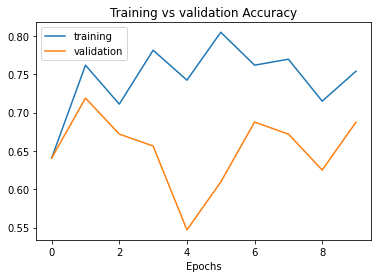

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [11]:
from google.colab import files
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training vs validation Accuracy')
plt.xlabel('Epochs')
plt.show()
plt.savefig('model_2_accuracy.png')
files.download('model_2_accuracy.png')

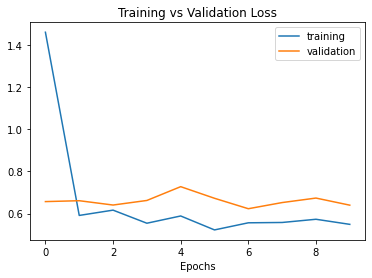

In [14]:


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
model.save("model2.h5")